##  Youtube User comments analysis 

In [0]:
#link: https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharin
#command: wget https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharing

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("youtube comment analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
spark.conf.set("spark.executor.heartbeatInterval","3600s")
spark.catalog.clearCache()

#### 0. Data Exploration and Cleaning

In [0]:
df_clean=spark.read.csv("/FileStore/tables/animals_comments.csv",inferSchema=True,header=True)
df_clean.head(5)

Out[ 103 ]: [Row(creator_name='Doug The Pug', userid=87.0, comment='I shared this to my friends and mom the were lol'),
 Row(creator_name='Doug The Pug', userid=87.0, comment='Super cute 😀🐕🐶'),
 Row(creator_name='bulletproof', userid=530.0, comment='stop saying get em youre literally dumb . have some common sense or dont own this kind of dog. fucking retarded I swear'),
 Row(creator_name='Meu Zoológico', userid=670.0, comment='Tenho uma jiboia e um largato'),
 Row(creator_name='ojatro', userid=1031.0, comment='I wanna see what happened to the pigs after that please')]

In [0]:
df_clean.count() 

Out[ 104 ]: 5820035

In [0]:
df_clean = df_clean.na.drop(subset=["comment"])
df_clean.count()

Out[ 105 ]: 5818984

In [0]:
df_clean.show()

+--------------------+------+-------------------------------------+
 creator_name|userid| comment|
+--------------------+------+-------------------------------------+
 Doug The Pug| 87.0| I shared this to ...|
 Doug The Pug| 87.0| Super cute 😀🐕🐶|
 bulletproof| 530.0| stop saying get e...|
 Meu Zoológico| 670.0| Tenho uma jiboia ...|
 ojatro|1031.0| I wanna see what ...|
 Tingle Triggers|1212.0| Well shit now Im ...|
Hope For Paws - O...|1806.0| when I saw the en...|
Hope For Paws - O...|2036.0| Holy crap. That i...|
 Life Story|2637.0|武器はクエストで貰えるんじゃないん...|
 Brian Barczyk|2698.0| Call the teddy Larry|
 The Dodo|2702.0| 😐🤔😓😢😭😭😭😭😟|
Hope For Paws - O...|2911.0| That mother cat l...|
Hope For Paws - O...|2911.0| Its people like H...|
 Talking Kitty Cat|2911.0| steve: No wet foo...|
 Brave Wilderness|3224.0| Dont call this a ...|
 MaxluvsMya|3267.0| why are you alway...|
Rise Up Society F...|3372.0| Deb Tucker|
 The Dodo|3466.0| Thats a deer isnt...|
 Brave Wilderness|3466.0| there is no safe ...|
 Brave Wilderness|3466.0| Red before yellow...|
+--------------------+------+-------------------------------------+
only showing top 20 rows

In [0]:
dogs = ['Labrador','German Shepherd','Golden Retriever','French Bulldog', \
        'Bulldog','Beagles','Poodles','Rottweiler' 'Pointer','German Shorthaired',\
        'Yorkshire Terrier','Boxer','Dachshund','Pembroke Welsh Corgis',\
        'Siberian Husky','Australian Shepherd','Great Dane','Doberman Pinscher',\
        'Cavalier King Charles Spaniel','Miniature Schnauzer','Shih Tzu',\
        'Boston Terrier','Bernese Mountain Dog','Pomeranian','Havanese',\
        'Shetland Sheepdog','Brittany','Spaniel','English Springer',\
        'Pug','Mastiff','Spaniel','Cocker','Vizsla','Cane Corso',\
        'Chihuahua','Miniature American Shepherd','Border Colly',\
        'Weimaraner','Maltese','Collie','Basset Hound','Newfoundland',\
        'Rhodesian Ridgeback',	'West Highland White Terrier','Belgian Malinois',\
        'Shiba Inu','Chesapeake Bay','Bichons Fry','Akitas','St. Bernard',\
        'Bloodhound','Portuguese Water Dog','Bullmastiff','puppy','pup','dog']

cats = ['Exotic','Ragdoll','British Shorthair','Persian','Maine Coon Cat',\
        'American Shorthair','Scottish Fold','Sphynx','Devon Rex','Abyssinian',
        'Oriental','Siamese','Cornish Rex','Norwegian Forest Cat','Siberian',\
        'Birman','Russian Blue','Bengal','Tonkinese','Burmese','Ocicat','American Curl',\
        'Selkirk Rex','Japanese Bobtail','Egyptian Mau','RagaMuffin','Somali','Balinese/Javanese',\
        'Manx','Singapura','Bombay','Colorpoint Shorthair','Turkish Angora','American Bobtail',\
        'European Burmese','Chartreux','Korat','Havana Brown','Burmilla','LaPerm','Turkish Van','American Wirehair','kitty','pussy','cat']


In [0]:
from pyspark.sql.functions import when
pets = dogs+cats
key_words1 = ["I have a "+pet for pet in pets]
key_words2 = ["my "+pet for pet in pets]
key_words = key_words1+key_words2

condition = when(df_clean["comment"].like("%my dog%"),1)
for key_word in key_words:
  condition = condition.when(df_clean["comment"].like("%"+key_word+"%"),1)


In [0]:
df_clean = df_clean.withColumn("label",(condition.otherwise(0)))

In [0]:
# find user with preference of dog and cat
# from pyspark.sql.functions import when
# from pyspark.sql.functions import col

# # you can user your ways to extract the label

# df_clean = df_clean.withColumn("label", \
#                            (when(df_clean["comment"].like("%my dog%"), 1) \
#                             .when(df_clean["comment"].like("%my dog%"), 1) \
#                            .when(df_clean["comment"].like("%I have a dog%"), 1) \
#                            .when(df_clean["comment"].like("%my cat%"), 1) \
#                            .when(df_clean["comment"].like("%I have a cat%"), 1) \
#                            .when(df_clean["comment"].like("%my puppy%"), 1) \
#                            .when(df_clean["comment"].like("%my pup%"), 1) \
#                            .when(df_clean["comment"].like("%my kitty%"), 1) \
#                             .when(df_clean["comment"].like("%my pup%"), 1) \
#                             .when(df_clean["comment"].like("%my kitty%"), 1) \
#                            .when(df_clean["comment"].like("%my pussy%"), 1) \
#                            .when(df_clean["comment"].like("%my Labrador%"), 1) \
#                              .when(df_clean["comment"].like("%I have a Labrador%"), 1) \
                           
                           
#                            .otherwise(0)))
# expr
#df_clean = df_clean.withColumn('label',when(col('comment').rlike(expr),1).otherwise(0))

In [0]:
df_clean.show()

+--------------------+------+-------------------------------------+-----+
 creator_name|userid| comment|label|
+--------------------+------+-------------------------------------+-----+
 Doug The Pug| 87.0| I shared this to ...| 0|
 Doug The Pug| 87.0| Super cute 😀🐕🐶| 0|
 bulletproof| 530.0| stop saying get e...| 0|
 Meu Zoológico| 670.0| Tenho uma jiboia ...| 0|
 ojatro|1031.0| I wanna see what ...| 0|
 Tingle Triggers|1212.0| Well shit now Im ...| 0|
Hope For Paws - O...|1806.0| when I saw the en...| 0|
Hope For Paws - O...|2036.0| Holy crap. That i...| 0|
 Life Story|2637.0|武器はクエストで貰えるんじゃないん...| 0|
 Brian Barczyk|2698.0| Call the teddy Larry| 0|
 The Dodo|2702.0| 😐🤔😓😢😭😭😭😭😟| 0|
Hope For Paws - O...|2911.0| That mother cat l...| 0|
Hope For Paws - O...|2911.0| Its people like H...| 0|
 Talking Kitty Cat|2911.0| steve: No wet foo...| 0|
 Brave Wilderness|3224.0| Dont call this a ...| 0|
 MaxluvsMya|3267.0| why are you alway...| 0|
Rise Up Society F...|3372.0| Deb Tucker| 0|
 The Dodo|3466.0| Thats a deer isnt...| 0|
 Brave Wilderness|3466.0| there is no safe ...| 0|
 Brave Wilderness|3466.0| Red before yellow...| 0|
+--------------------+------+-------------------------------------+-----+
only showing top 20 rows

#### 1. Data preprocessing and Build the classifier

In [0]:
from pyspark.ml.feature import RegexTokenizer, Word2Vec
from pyspark.ml.classification import LogisticRegression

regexTokenizer = RegexTokenizer(inputCol="comment", outputCol="words", pattern="\\W")
word2Vec = Word2Vec(inputCol="words", outputCol="features")


In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[regexTokenizer, word2Vec])

# Fit the pipeline to training documents.
pipelineFit = pipeline.fit(df_clean)
dataset = pipelineFit.transform(df_clean)

In [0]:

dataset.head(5)

Out[ 113 ]: [Row(creator_name='Doug The Pug', userid=87.0, comment='I shared this to my friends and mom the were lol', label=0, words=['i', 'shared', 'this', 'to', 'my', 'friends', 'and', 'mom', 'the', 'were', 'lol'], features=DenseVector([-0.0723, 0.0462, 0.1065, -0.186, -0.0022, -0.0732, -0.0007, 0.0619, 0.0464, 0.0264, -0.0622, 0.052, 0.0086, -0.0239, 0.0154, -0.0431, 0.0479, -0.0555, 0.0134, -0.0163, -0.1083, 0.2686, 0.0759, 0.01, 0.0892, 0.0278, 0.0583, -0.1432, 0.1026, -0.0783, -0.0517, -0.054, -0.0272, 0.1188, -0.059, -0.0458, 0.121, 0.0761, -0.0462, 0.0505, 0.0059, -0.0557, -0.0755, 0.129, 0.0481, -0.0839, 0.0435, -0.1281, 0.0499, -0.0944, -0.0222, 0.0063, 0.1095, -0.019, 0.0647, 0.0078, 0.1265, 0.0785, 0.0543, 0.0938, 0.0185, -0.0805, -0.0323, 0.0362, 0.0467, 0.0458, -0.0024, 0.0373, -0.02, 0.0903, 0.024, 0.0958, 0.1504, 0.0532, 0.1226, -0.0065, 0.0009, 0.0313, -0.1192, -0.0366, -0.1073, -0.0294, 0.0757, -0.2384, -0.1934, -0.1536, 0.025, -0.1968, -0.0738, -0.0749, 0.0571, 0.0855, -0.0771, -0.0359, -0.1616, 0.04, 0.014, -0.0331, -0.0504, -0.0572])),
 Row(creator_name='Doug The Pug', userid=87.0, comment='Super cute 😀🐕🐶', label=0, words=['super', 'cute'], features=DenseVector([0.0973, -0.345, 0.0786, -0.3135, -0.0371, -0.2789, 0.0112, -0.0758, -0.2755, -0.0108, -0.1294, -0.3212, -0.2176, 0.0192, -0.1333, 0.3517, 0.1446, -0.1624, -0.0486, -0.0749, 0.1171, 0.2127, 0.065, -0.1051, 0.3524, 0.0821, -0.2054, -0.0804, -0.1412, 0.1142, -0.415, 0.1902, 0.1404, 0.1749, -0.4045, -0.0682, 0.15, -0.2618, 0.3187, -0.0325, 0.2509, -0.1934, 0.2224, -0.1431, 0.0082, 0.121, -0.1157, 0.1001, 0.0868, 0.0462, 0.006, 0.1949, 0.0073, 0.0808, 0.197, 0.1489, 0.3341, 0.0092, 0.3081, -0.0713, -0.1105, 0.0943, -0.1008, -0.0298, 0.1892, 0.0233, 0.0443, 0.0267, 0.0453, 0.3703, -0.044, 0.0448, 0.1145, 0.1575, -0.0681, -0.0919, -0.0606, 0.007, 0.1125, 0.3689, -0.0181, 0.2174, 0.1087, 0.0694, 0.4002, -0.0768, -0.0176, -0.1225, 0.1821, -0.0211, 0.0448, -0.161, -0.1994, -0.216, -0.0855, -0.2878, -0.3041, 0.038, -0.2506, -0.3163])),
 Row(creator_name='bulletproof', userid=530.0, comment='stop saying get em youre literally dumb . have some common sense or dont own this kind of dog. fucking retarded I swear', label=0, words=['stop', 'saying', 'get', 'em', 'youre', 'literally', 'dumb', 'have', 'some', 'common', 'sense', 'or', 'dont', 'own', 'this', 'kind', 'of', 'dog', 'fucking', 'retarded', 'i', 'swear'], features=DenseVector([-0.0506, -0.0028, 0.0705, -0.1271, 0.035, -0.1024, -0.26, 0.0808, 0.0185, -0.072, -0.0106, 0.0198, 0.0453, -0.0445, -0.104, -0.0045, 0.1179, -0.0604, 0.1131, 0.0809, -0.0805, 0.0834, 0.0913, -0.0552, 0.0167, 0.0702, 0.0858, 0.004, 0.1674, -0.0004, -0.0286, -0.0484, 0.016, -0.0027, 0.073, -0.1423, 0.1807, -0.0886, 0.0513, -0.0795, 0.0313, -0.0722, 0.0051, 0.1209, 0.2299, -0.0495, 0.1275, 0.0018, 0.0272, -0.015, -0.0237, -0.043, 0.0993, -0.0039, -0.0689, -0.0069, 0.0185, -0.0162, 0.0082, 0.1207, 0.0576, -0.1014, -0.0055, 0.0053, -0.1232, 0.0065, 0.0373, 0.0712, -0.0115, 0.0996, 0.134, 0.0631, 0.1523, -0.0218, 0.0117, -0.1216, 0.0529, 0.1302, -0.0188, 0.0358, -0.0511, -0.0938, 0.0443, -0.0756, -0.0556, -0.0552, -0.0166, -0.2212, -0.0211, -0.0459, 0.1353, 0.0467, -0.0429, -0.0396, 0.0714, -0.0118, 0.1074, -0.0766, 0.024, -0.0789])),
 Row(creator_name='Meu Zoológico', userid=670.0, comment='Tenho uma jiboia e um largato', label=0, words=['tenho', 'uma', 'jiboia', 'e', 'um', 'largato'], features=DenseVector([-0.3916, 0.1766, -0.1078, -0.0173, 0.1734, 0.0209, -0.0721, 0.075, -0.0878, 0.0374, -0.1445, -0.0743, -0.0069, -0.229, 0.0477, 0.0732, -0.3743, 0.1015, -0.0773, 0.174, 0.0137, -0.1497, 0.0441, -0.0765, -0.2372, 0.1609, -0.1194, 0.1948, 0.2907, 0.1305, 0.0586, 0.0817, -0.3884, -0.2576, -0.4373, 0.2466, 0.2403, -0.2055, 0.0366, -0.1326, 0.0407, -0.0403, 0.3839, -0.2489, 0.2964, -0.0759, 0.6868, 0.2701, -0.4109, -0.0177, 0.3878, -0.1555, -0.2294, -0.158, 0.0494, 0.1599, -0.1407, -0.4018, -0.1535, 0.2227, -0.2189, 0.5849, -0.2176, 0.3062, 0

In [0]:
from pyspark.sql.functions import col
Label1_count = dataset.filter(col('label')==1).count()
Label0_count = dataset.filter(col('label')==0).count()
print("1-label data is: "+str(Label1_count),"\n0-label data is: "+str(Label0_count))

1-label data is: 41391 
0-label data is: 5777593

number of 1-label data and 0-label are off by more than 100 times, so the dataset is highly skewed. We need to do down-sampling for the 0-label data. Since 40K data is big enough for training, we will downsampling the 0-label data to be same with the 1-label data, so their ratio is close to 1:1 (use only about 40k data from the 5.7M 0-label data)

In [0]:
(label1_train, label1_test)=dataset.filter(col('label')==1).randomSplit([0.8,0.2],seed = 100)
(label0_train, label0_ex)=dataset.filter(col('label')==0).randomSplit([0.005, 0.995],seed = 100)
(label0_test, label0_ex2)=label0_ex.randomSplit([0.002,0.998],seed = 100)

In [0]:
trainingData = label1_train.union(label0_train)
testData=label1_test.union(label0_test)

In [0]:
#print("Dataset Count: " + str(dataset.count()))
print("Training Dataset Count: " + str(trainingData.count()))
# print("Validation Dataset Count: " + str(validationData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 61787
Test Dataset Count: 19615

In [0]:
trainingData.cache()
testData.cache()

Out[ 117 ]: DataFrame[creator_name: string, userid: double, comment: string, label: int, words: array<string>, features: vector]

##### LogisticRegression

In [0]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [0]:
def train_LR(trainingData, maxiter, reg_param):
    best_regularization = 0
    best_iteration = 0
    best_model = None
    best_roc = 0
    lr = LogisticRegression()
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
    ROCs = []
    for reg in reg_param:
      ROC = []
      for itera in maxiter:
              paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [reg]).addGrid(lr.maxIter, [itera]).build())
              cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
              model = cv.fit(trainingData)
              roc = model.avgMetrics[0]
              #predictions = model.transform(testData)
              #roc = evaluator.evaluate(predictions)
              ROC.append(roc)
              if len(ROC) == len(reg_param):
                ROCs.append(ROC)
              print ('{} iteration and regularization = {}: average AUC is {}'.format(itera, reg, roc))
            
              if roc > best_roc:
                best_roc = roc
                best_iteration = itera
                best_regularization = reg
                best_model = model
    print ('\nThe best model has {} iteration and regularization = {},with AUC = {}'.format(best_iteration, best_regularization,best_roc))
    return ROCs,best_model 

In [0]:
maxiter = [1, 5, 10]
reg_param = [0.01, 0.5, 2.0]
lr_ROCs, best_model = train_LR(trainingData, maxiter,reg_param)

1 iteration and regularization = 0.01: average AUC is 0.9247046788875871
5 iteration and regularization = 0.01: average AUC is 0.9435034697265106
10 iteration and regularization = 0.01: average AUC is 0.9563585863743205
1 iteration and regularization = 0.5: average AUC is 0.9247046788875875
5 iteration and regularization = 0.5: average AUC is 0.9398347500644163
10 iteration and regularization = 0.5: average AUC is 0.945467516188904
1 iteration and regularization = 2.0: average AUC is 0.924704678887587
5 iteration and regularization = 2.0: average AUC is 0.9369767042407879
10 iteration and regularization = 2.0: average AUC is 0.9359852007512148

The best model has 10 iteration and regularization = 0.01,with AUC = 0.9563585863743205

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
predictions = best_model.transform(testData)
print("the testData AUC is: "+str(evaluator.evaluate(predictions)))

the testData AUC is: 0.9563183103490603

In [0]:
import numpy as np
lr_ROC = np.array(lr_ROCs)
import seaborn as sns
import matplotlib.pyplot as plt

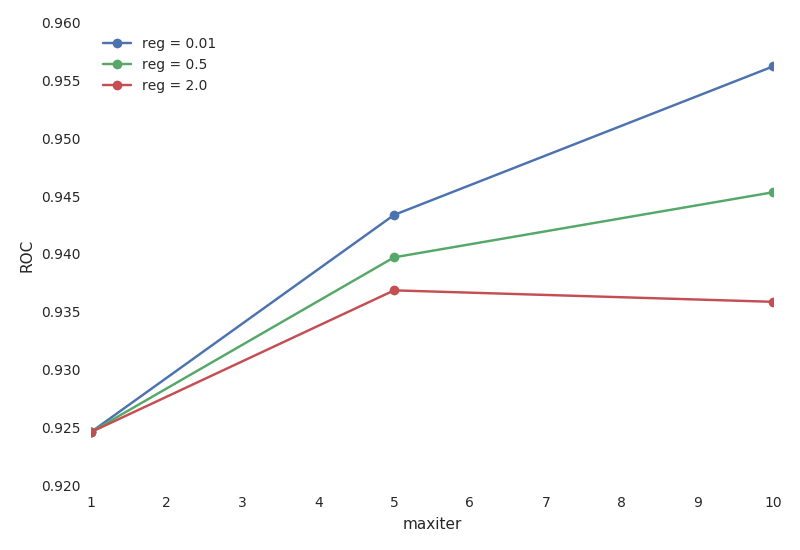

In [0]:

fig,ax = plt.subplots()
ax.plot(maxiter,lr_ROC[0,:],marker = 'o',label = 'reg = 0.01')
ax.plot(maxiter,lr_ROC[1,:],marker = 'o',label = 'reg = 0.5')
ax.plot(maxiter,lr_ROC[2,:],marker = 'o',label = 'reg = 2.0')
ax.set_xlabel('maxiter')
ax.set_ylabel('ROC')
ax.legend(loc = 'upperleft')

fig.tight_layout()
display(fig)


##### RandomForest

In [0]:
from pyspark.ml.classification import RandomForestClassifier

In [0]:
def train_RF(trainingData, numTrees, maxDepth):
    best_num_trees = 0
    best_max_depth = 0
    best_model = None
    best_roc = 0
    rf = RandomForestClassifier(seed=42)
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
    rf_ROCs = []
    for num_tree in numTrees:
      ROC = []
      for depth in maxDepth:
            paramGrid = (ParamGridBuilder().addGrid(rf.numTrees, [num_tree]).addGrid(rf.maxDepth, [depth]).build())
            cv = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
            model = cv.fit(trainingData)
            roc = model.avgMetrics[0]
            ROC.append(roc)
            if len(ROC) == len(maxDepth):
              rf_ROCs.append(ROC)
            print ('{} number of trees and maximum depth = {}: avreage AUC is {}'.format(num_tree, depth, roc))
            
            if roc > best_roc:
                best_roc = roc
                best_num_trees = num_tree
                best_max_depth = depth
                best_model = model
    print ('\nThe best model has {} trees and maximum = {},with a roc = {}'.format(best_num_trees, best_max_depth,best_roc))
    return rf_ROCs,best_model 

In [0]:
numTrees = [10,20,50]
maxDepth = [1,5,10]
rf_ROCs, best_model1 = train_RF(trainingData, numTrees,maxDepth)

10 number of trees and maximum depth = 1: avreage AUC is 0.8577484637053813
10 number of trees and maximum depth = 5: avreage AUC is 0.9364601921328538
10 number of trees and maximum depth = 10: avreage AUC is 0.9576984772105444
20 number of trees and maximum depth = 1: avreage AUC is 0.8845475593690646
20 number of trees and maximum depth = 5: avreage AUC is 0.9420869945930664
20 number of trees and maximum depth = 10: avreage AUC is 0.9612199294878707
50 number of trees and maximum depth = 1: avreage AUC is 0.9062622441082733
50 number of trees and maximum depth = 5: avreage AUC is 0.9496775707941773
50 number of trees and maximum depth = 10: avreage AUC is 0.9648375165465486

The best model has 50 trees and maximum = 10,with a roc = 0.9648375165465486

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
predictions = best_model1.transform(testData)
print("the testData AUC is: "+str(evaluator.evaluate(predictions)))

the testData AUC is: 0.964590572910228

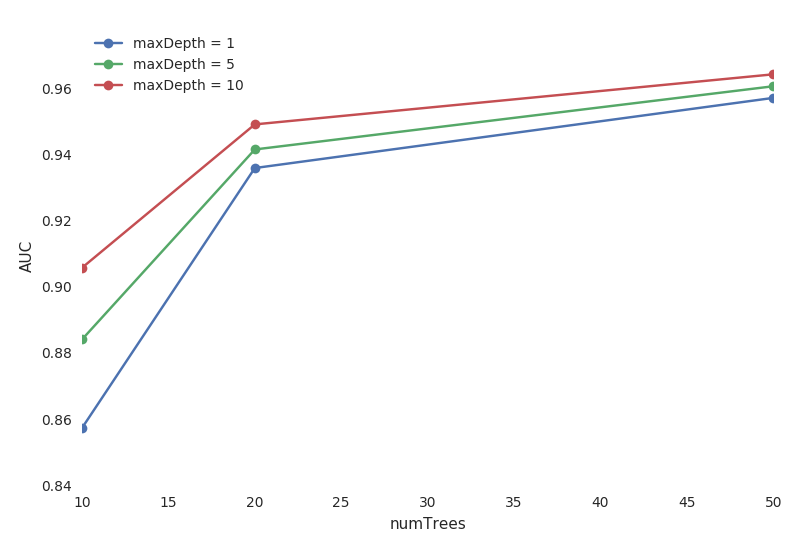

In [0]:
rf_ROC = np.array(rf_ROCs)
fig,ax = plt.subplots()
ax.plot(numTrees,rf_ROC[0,:],marker = 'o',label = 'maxDepth = 1')
ax.plot(numTrees,rf_ROC[1,:],marker = 'o',label = 'maxDepth = 5')
ax.plot(numTrees,rf_ROC[2,:],marker = 'o',label = 'maxDepth = 10')

ax.set_xlabel('numTrees')
ax.set_ylabel('AUC')
ax.legend(loc = 'upperleft')

fig.tight_layout()
display(fig)

##### Gradient boosting

In [0]:
from pyspark.ml.classification import GBTClassifier

In [0]:
def train_GB(trainingData, numTrees, maxDepth):
    best_iteration = 0
    best_max_depth = 0
    best_model = None
    best_roc = 0
    GB = GBTClassifier(seed=43432)
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
    GB_ROCs = []
    for itera in maxIter:
      ROC = []
      for depth in maxDepth:
            paramGrid = (ParamGridBuilder().addGrid(GB.maxIter, [itera]).addGrid(GB.maxDepth, [depth]).build())
            cv = CrossValidator(estimator=GB, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
            model = cv.fit(trainingData)
            roc = model.avgMetrics[0]
            ROC.append(roc)
            if len(ROC) == len(maxDepth):
              GB_ROCs.append(ROC)
            print ('{} iteration and maximum depth = {}: Average AUC is {}'.format(itera, depth, roc))
            
            if roc > best_roc:
                best_roc = roc
                best_iteration = itera
                best_max_depth = depth
                best_model = model
    print ('\nThe best model has {} iteration and maximum_depth = {},with AUC = {}'.format(best_iteration, best_max_depth,best_roc))
    return GB_ROCs,best_model 

In [0]:
maxIter = [1,5,10]
maxDepth = [1,5,10]
GB_ROCs, best_model2 = train_GB(trainingData, maxIter,maxDepth)

1 iteration and maximum depth = 1: Average AUC is 0.6888205724548444
1 iteration and maximum depth = 5: Average AUC is 0.8606735660380546
1 iteration and maximum depth = 10: Average AUC is 0.8957745294051207
5 iteration and maximum depth = 1: Average AUC is 0.8478620844523921
5 iteration and maximum depth = 5: Average AUC is 0.9253258255718837
5 iteration and maximum depth = 10: Average AUC is 0.9377109746089313
10 iteration and maximum depth = 1: Average AUC is 0.8899787689856622
10 iteration and maximum depth = 5: Average AUC is 0.9417168258216713
10 iteration and maximum depth = 10: Average AUC is 0.9508605701529933

The best model has 10 iteration and maximum_depth = 10,with AUC = 0.9508605701529933

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol='label',metricName='areaUnderROC')
predictions = best_model2.transform(testData)
print("the testData AUC is: "+str(evaluator.evaluate(predictions)))

the testData AUC is: 0.950753316050469

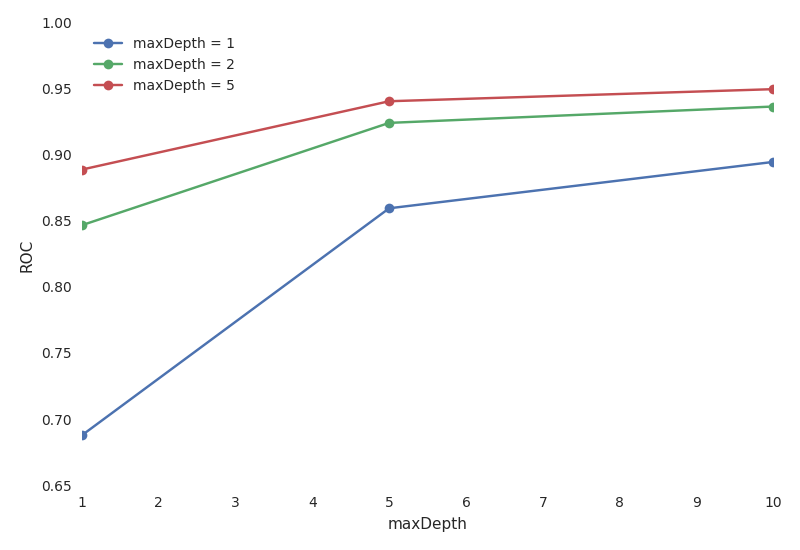

In [0]:
GB_ROC = np.array(GB_ROCs)
fig,ax = plt.subplots()
ax.plot(maxIter,GB_ROC[0,:],marker = 'o',label = 'maxDepth = 1')
ax.plot(maxIter,GB_ROC[1,:],marker = 'o',label = 'maxDepth = 2')
ax.plot(maxIter,GB_ROC[2,:],marker = 'o',label = 'maxDepth = 5')
ax.set_xlabel('maxDepth')
ax.set_ylabel('ROC')
ax.legend(loc = 'upperleft')

fig.tight_layout()
display(fig)

I found that the best model is the random forest model which has a best AUC score of 0.964, However, since the 3 models' performance are very close to each other, the other two model may have close or better performance if we fine tune the hyper-parameters

#### 2. Classify All The Users

In [0]:
the_best_model = best_model1    # random forest model 

In [0]:
prediction = the_best_model.transform(dataset)
total_pet_owner = prediction.filter("prediction = 1.0").select("userid").distinct().count()
total_population = prediction.select("userid").distinct().count()
pet_owner_ratio = float(total_pet_owner)/float(total_population)
print('total_pet_owner :',total_pet_owner)
print('total_population :',total_population)
print('pet_owner_ratio :',pet_owner_ratio)

total_pet_owner : 548167
total_population : 2536892
pet_owner_ratio : 0.21607817754953698

#### 3. Get insigts of Users

In [0]:
from pyspark.ml.clustering import LDA
from pyspark.ml.feature import CountVectorizer, CountVectorizerModel
from pyspark.ml.feature import StopWordsRemover

pet_owner = prediction.filter("prediction = 1.0").select('userid','comment')

regexTokenizer = RegexTokenizer(inputCol="comment", outputCol="words", pattern="\\W")
remover = StopWordsRemover(inputCol = "words", outputCol="words_no_stop")

pipeline = Pipeline(stages=[regexTokenizer,remover])
pipelinefit = pipeline.fit(pet_owner)
clean_owner =pipelinefit.transform(pet_owner)

cv = CountVectorizer(inputCol = "words_no_stop", outputCol = "features", minTF=2,minDF=4)
# Fit the pipeline to training documents.
countVectorModel = cv.fit(clean_owner)
countVectors = countVectorModel.transform(clean_owner).select("userid", "features").cache()

lda = LDA(k = 10,maxIter = 50)
ldaModel = lda.fit(countVectors)
topics = ldaModel.describeTopics(maxTermsPerTopic=20)
vocabArray = countVectorModel.vocabulary

ListOfIndexToWords = udf(lambda wl: list([vocabArray[w] for w in wl]))
FormatNumbers = udf(lambda nl: ["{:1.4f}".format(x) for x in nl])

topics.select(ListOfIndexToWords(topics.termIndices).alias('words')).show(truncate=False, n=10)

+-----------------------------------------------------------------------------------------------------------------------------------------+
words |
+-----------------------------------------------------------------------------------------------------------------------------------------+
[dogs, people, good, dog, hes, fish, go, time, back, life, get, said, animal, well, know, one, always, like, also, way] |
[cat, videos, make, day, need, never, bit, house, watch, feel, oh, use, maybe, something, found, stop, brother, eyes, every, eye] |
[im, 3, going, hope, kittens, kitty, m, sorry, poor, friend, lot, theyre, glad, get, guinea, molly, cheese, start, pig, funny] |
[dog, get, cats, food, old, mom, think, 2, eat, guys, puppy, two, please, year, years, kids, even, man, boo, getting] |
[video, know, water, happy, channel, watching, show, ever, give, best, better, coyote, d, buy, omg, wish, someone, litter, night, trying]|
[one, horse, horses, lol, shes, time, see, big, bunny, ride, riding, mother, head, puppies, room, helmet, hair, hermit, hurt, id] |
[little, cage, cute, hamster, look, rabbit, thats, husky, sad, new, fucking, turtles, rabbits, xd, bed, box, betta, ears, friends, toy] |
[like, u, animals, help, tank, ive, great, ur, snakes, bird, looks, still, 1, birds, scared, hand, birthday, face, let, rats] |
[love, dont, really, much, want, animals, get, know, snake, pet, care, name, one, people, think, take, channel, family, god, snakes] |
[got, bad, black, gohan, feed, mine, breed, makes, tail, hamsters, kid, female, gecko, snow, legs, wants, vegan, 4, doberman, kitties] |
+-----------------------------------------------------------------------------------------------------------------------------------------+

Manually choose top 10 noun words with specific meaning as the topic words (excect dog and cat words):

<br>fish
<br>animal
<br>videos 
<br>house 
<br>eye(s) 
<br>friend 
<br>cheese 
<br>pig 
<br>food
<br>mom 
<br>kids

#### 4. Identify Creators With Cat And Dog Owners In The Audience

In [0]:
from pyspark.sql.functions import countDistinct
tmp = prediction.filter("prediction = 1.0")
tmp.groupBy('creator_name').agg(countDistinct('userid')).sort('count(DISTINCT userid)',ascending= False).show()

+--------------------+----------------------+
 creator_name|count(DISTINCT userid)|
+--------------------+----------------------+
 Brave Wilderness| 75932|
 The Dodo| 48018|
 Taylor Nicole Dean| 44203|
 Brian Barczyk| 32024|
Hope For Paws - O...| 25667|
 Gohan The Husky| 20024|
 Vet Ranch| 19314|
 Robin Seplut| 17628|
 Cole & Marmalade| 12281|
 stacyvlogs| 12146|
 Talking Kitty Cat| 11768|
 ViralHog| 11274|
Gone to the Snow ...| 10589|
 Viktor Larkhill| 10059|
 RaleighLink14| 8956|
Zak Georges Dog T...| 8519|
 Paws Channel| 7535|
 Think Like A Horse| 7454|
 Steff J| 5912|
 MonkeyBoo| 5458|
+--------------------+----------------------+
only showing top 20 rows

We found that "Brave Widerness", "The Dodo" and "Taylor Nicole Dean" are the top 3 video creators who have the most pet owners in the audience

#### 5. Analysis and Future work



In this project, I analyzed 5,000,000+ user comments on Youtube videos data via Python and Spark to identify potential pet owners. 
The dataset is clean and in good shape already, but it lacks labels. To perform a supervise learning task, I first label the data using key words rules. Then I biult a machine learning pipeline for pet owner classification and mined the potenital topics that most related to them.

 
The data has 4 columns: "creator_name", "userid", "comment", "label", I cleaned it by drop the rows with null comment.
I then used tokenizer and word2vec to featurize the comment text to vector representation so that it can be learned by a model.
Next I chose 3 clssification models, Logistic regression, random forest and Gradient Boosting Tree to build the classifer.
I used 5-fold cross-validation and grid search to find the best hyperparameter for each model and choose the best model with the highest AUC score random forest 0.964.


Afer selecting the best model, I used it to predict the pet ownership for all users and calculated the ratio of pet owners in all youtube users which is about 21.6%. I then mined the latent topics that most related to these pet owner using tokenizer, stop-word remover, Countvectorizer and LDA pipeline. 


Since we have found the topics that most related to the pet owners and indentified the video creator who has most pet owners in the audience, we can recommende Google Ads to use our model results to generate more customized ads (featurized on these topics) for the youtube users who owns pets, especially post these customized ads on the creator's videos who we found has most pet owner in the audience. 
By doing so, we can expect a significant increase of the ads click rate.